In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
import numpy as np
import pylab as plt

# pick up local libraries
sys.path.append(os.path.join('..', 'src'))
sys.path.append(os.path.join('..', 'src', 'thirdparty'))

import emlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


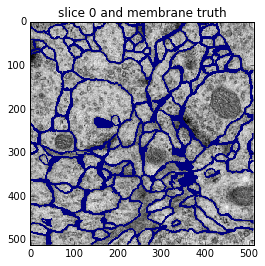

In [22]:
Xtrain = emlib.load_cube('../data/ISBI2012/train-volume.tif')
Ytrain = emlib.load_cube('../data/ISBI2012/train-labels.tif')
Ytrain = Ytrain[:,0,...] # discard channel dimension for truth data

Ycell = np.ma.masked_where(Ytrain!=0, Ytrain)  # membranes are Y=0

plt.imshow(Xtrain[0,0,...], cmap=plt.cm.gray, interpolation='none')
plt.hold(True)
plt.imshow(Ycell[0,...], cmap=plt.cm.jet, interpolation='none')
plt.title('slice 0 and membrane truth')

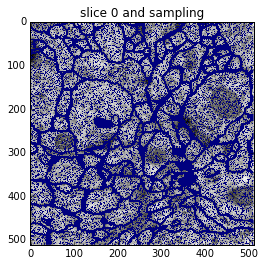

In [25]:
gen = emlib.stratified_interior_pixel_generator(Ytrain, 0, 100)
Ysamp = np.zeros(Ytrain.shape)

for idx, pctComplete in gen:
    Ysamp[idx[:,0], idx[:,1], idx[:,2]] = 1;
Ysamp = np.ma.masked_where(Ysamp==0, Ysamp)

plt.imshow(Xtrain[0,0,...], cmap=plt.cm.gray, interpolation='none')
plt.hold(True)
plt.imshow(Ysamp[0,...], cmap=plt.cm.jet, interpolation='none')
plt.title('slice 0 with uniform balanced sampling');